In [15]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model


In [16]:
#Get the Dataset
df = pd.read_csv("../dados/raw/GLD.csv", index_col=0)
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2005-01-03,43.020000,43.020000,43.169998,42.740002,42.980000,4750400
1,2005-01-04,42.740002,42.740002,42.910000,42.459999,42.799999,3456800
2,2005-01-05,42.669998,42.669998,42.880001,42.599998,42.750000,2033600
3,2005-01-06,42.150002,42.150002,42.560001,42.070000,42.480000,2556400
4,2005-01-07,41.840000,41.840000,42.389999,41.700001,42.090000,4492700


<Axes: >

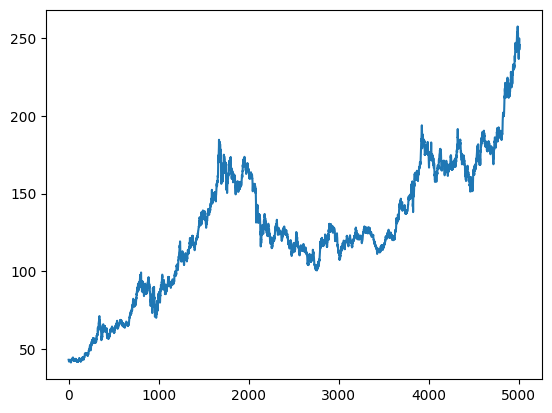

In [17]:
df["Close"].plot()

In [18]:
#Set Target Variable
output_var = pd.DataFrame(df["Close"])
#Selecting the Features
features = ['High', 'Low', 'Open', 'Volume']

In [19]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,High,Low,Open,Volume
0,0.008366,0.008004,0.009039,0.047399
1,0.007164,0.006701,0.008205,0.033562
2,0.007026,0.007353,0.007973,0.018338
3,0.005547,0.004886,0.006721,0.023930
4,0.004761,0.003164,0.004914,0.044643


In [20]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=2)
for train_index, test_index in timesplit.split(feature_transform):
    X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
    y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [21]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [22]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation="relu", return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss="mean_squared_error", optimizer="adam")
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [23]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
418/418 [==============================] - 1s 1ms/step - loss: 11678.9775
Epoch 2/100
418/418 [==============================] - 1s 1ms/step - loss: 7356.2495
Epoch 3/100
418/418 [==============================] - 1s 1ms/step - loss: 2627.1367
Epoch 4/100
418/418 [==============================] - 1s 1ms/step - loss: 464.2484
Epoch 5/100
418/418 [==============================] - 1s 1ms/step - loss: 52.4428
Epoch 6/100
418/418 [==============================] - 1s 1ms/step - loss: 28.4918
Epoch 7/100
418/418 [==============================] - 1s 1ms/step - loss: 26.9566
Epoch 8/100
418/418 [==============================] - 1s 1ms/step - loss: 24.0418
Epoch 9/100
418/418 [==============================] - 1s 1ms/step - loss: 20.7818
Epoch 10/100
418/418 [==============================] - 1s 1ms/step - loss: 17.7732
Epoch 11/100
418/418 [==============================] - 1s 1ms/step - loss: 15.0720
Epoch 12/100
418/418 [==============================] - 1s 1ms/step - loss: 1

In [24]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

53/53 [==============================] - 0s 6ms/step


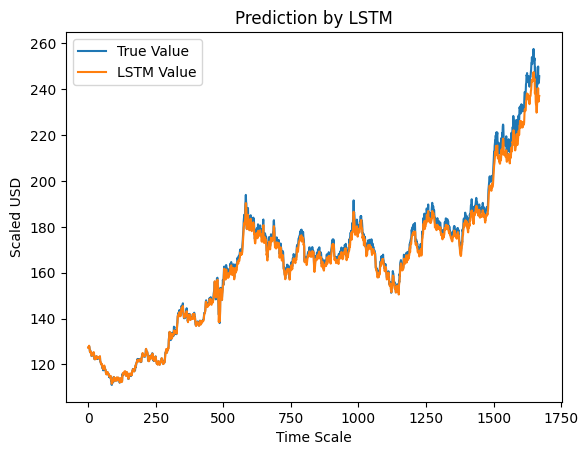

In [25]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label="True Value")
plt.plot(y_pred, label="LSTM Value")
plt.title("Prediction by LSTM")
plt.xlabel("Time Scale")
plt.ylabel("Scaled USD")
plt.legend()
plt.show()